# Dataset Preview

### Notebook utilizado para pré visualização dos dados de exame

### Pacotes Utilizados:

In [ ]:
%pip install pyEDFlib
%pip install mne

In [ ]:
#Definindo padrões de plot
plot_kwargs = {
    'scalings': dict(eeg=20e-5),
    'show_scrollbars': False,
}

#Definindo esse canais, pois são os presentes em todos os pacientes
selected_channels = [
    'P8-O2',
    'CZ-PZ',
    'T8-P8',
    'T7-P7',
    'FZ-CZ',
    'C3-P3',
    'P4-O2',
    'C4-P4',
    'FP1-F7',
    'F3-C3',
    'F4-C4',
    'P7-O1',
    'FP2-F8',
    'F7-T7',
    'FP2-F4',
    'FP1-F3',
    'P3-O1',
    'F8-T8'
]

In [16]:
import database.databaseutils as db
import reader.edfreader as edfreader
import reader.mnereader as mnereader
import model.summarymodel as summary
import model.summarymodelconverter as converter

db.connect()

st = db.summary_by_name('chb04_28.edf')
summary_model = converter.model_from_tuple(st)
seizures = [ int(x) for x in summary_model.start_seizure, int(x) for x in summary_model.end_seizure ]

data, freq = edfreader.raw_data(summary_model, selected_channels)
#(a if a < b else b)
mne_data = mnereader.mne_object(data, freq, events = seizures if summary_model.nr_seizures > 0 else None)

SyntaxError: invalid syntax (4044522995.py, line 11)

[['1679', '3782'], ['1781', '3898']]


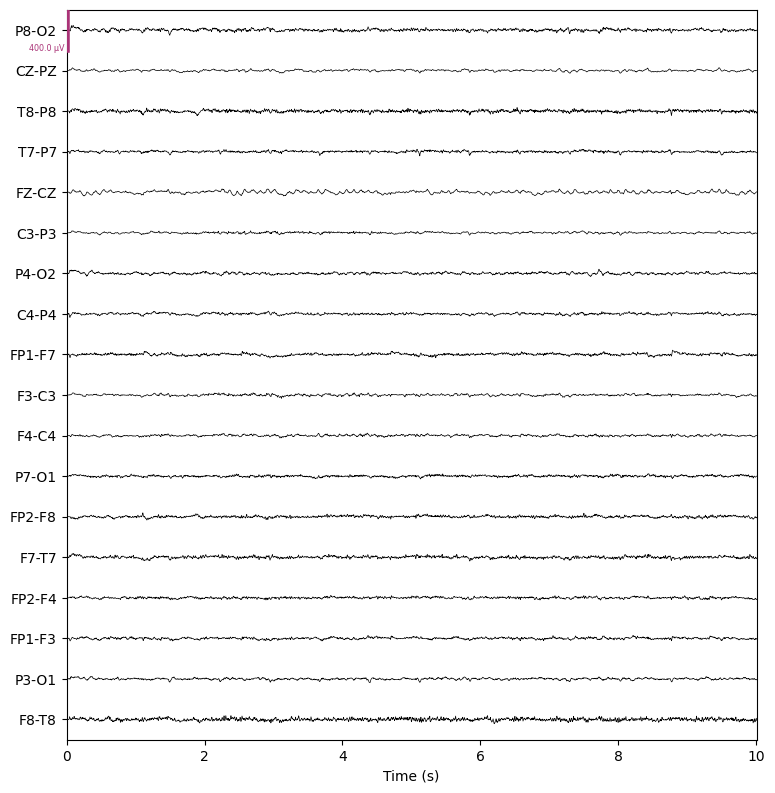

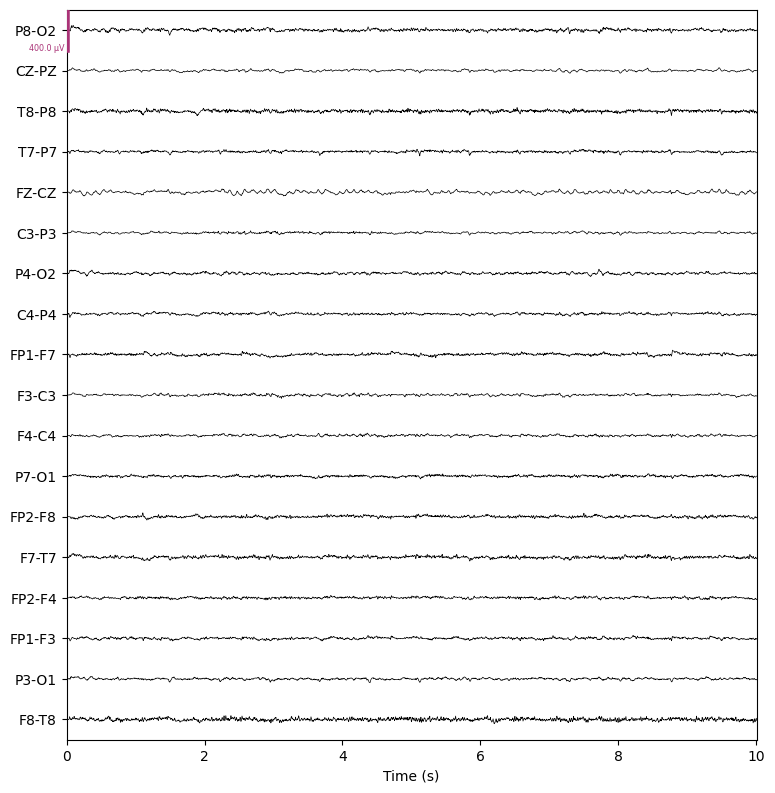

In [12]:
seizures = [summary_model.start_seizure, summary_model.end_seizure]
print(seizures)
# summary_model.nr_seizures == 0 ? None, [summary_model.start_seizure]
mne_data.plot(start = 0, **plot_kwargs)

In [ ]:
import re
import matplotlib.pyplot as plt

replace_dict = {}
drop_list = []
for channel_name in mne_data.info['ch_names']:
    name_change = re.findall('\w+',channel_name)[0].title()
    if name_change in list(replace_dict.values()):
        drop_list.append(channel_name)
    else:
        replace_dict[channel_name] = name_change

mne_data.drop_channels(drop_list)
mne_data.rename_channels(replace_dict)
mne_data.set_montage('standard_1020')

In [ ]:
mne_data.plot_sensors(kind='topomap', show_names=True, to_sphere=True)
fig = mne_data.plot_sensors(kind='3d', show_names=True, show=False)
fig = fig.gca().view_init(azim=70, elev=15)
plt.show()